In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using the correct function for Excel files
try:
    df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please upload '1730285881-Airbnb_Open_Data.xlsx' to your Colab environment.")
    df = None

if df is not None:
    # --- Data Cleaning and Preprocessing ---
    print("\n--- Data Cleaning and Preprocessing ---")

    # Drop irrelevant columns based on the problem statement and data preview
    df.drop(['id', 'NAME', 'host id', 'host name', 'country', 'country code', 'last review', 'license'], axis=1, inplace=True)

    # Handle missing values
    df['reviews per month'].fillna(0, inplace=True)
    df['house_rules'].fillna('Not specified', inplace=True)
    df['Construction year'].fillna(df['Construction year'].mode()[0], inplace=True)
    df.dropna(inplace=True)

    # Convert 'price' and 'service fee' columns to numeric, handling potential errors
    df['price'] = pd.to_numeric(df['price'].astype(str).str.replace(',', ''), errors='coerce')
    df['service fee'] = pd.to_numeric(df['service fee'].astype(str).str.replace(',', ''), errors='coerce')
    df.dropna(subset=['price', 'service fee'], inplace=True)

    print("Data cleaning complete.")





Dataset loaded successfully.

--- Data Cleaning and Preprocessing ---


/tmp/ipython-input-1024377884.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews per month'].fillna(0, inplace=True)
/tmp/ipython-input-1024377884.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Data cleaning complete.



--- 1. Price Distribution Analysis ---


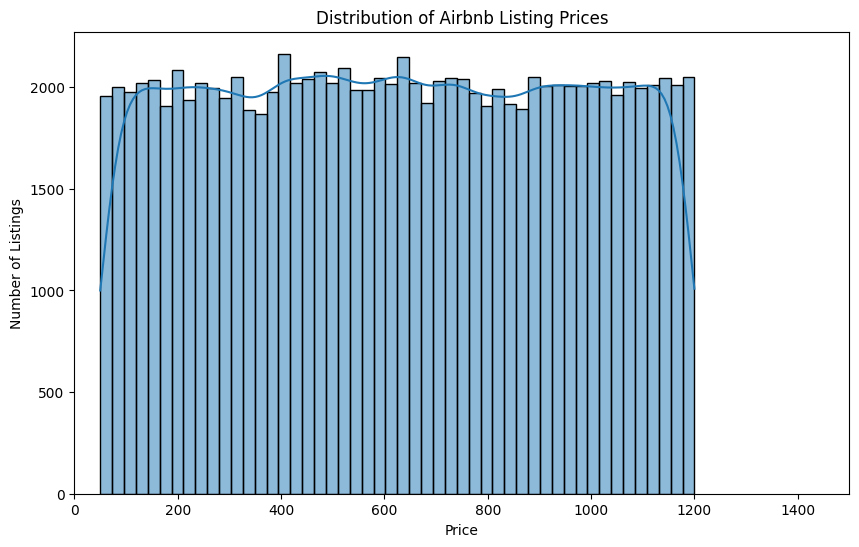

In [17]:
# --- Exploratory Data Analysis (EDA) and Visualization ---

    # 1. Price Distribution
if df is not None:
        print("\n--- 1. Price Distribution Analysis ---")
        plt.figure(figsize=(10, 6))
        sns.histplot(df['price'], bins=50, kde=True)
        plt.title('Distribution of Airbnb Listing Prices')
        plt.xlabel('Price')
        plt.ylabel('Number of Listings')
        plt.xlim(0, 1500) # Limiting x-axis for better visualization of main data points
        plt.show()


--- 2. Geographic Hotspots Analysis ---


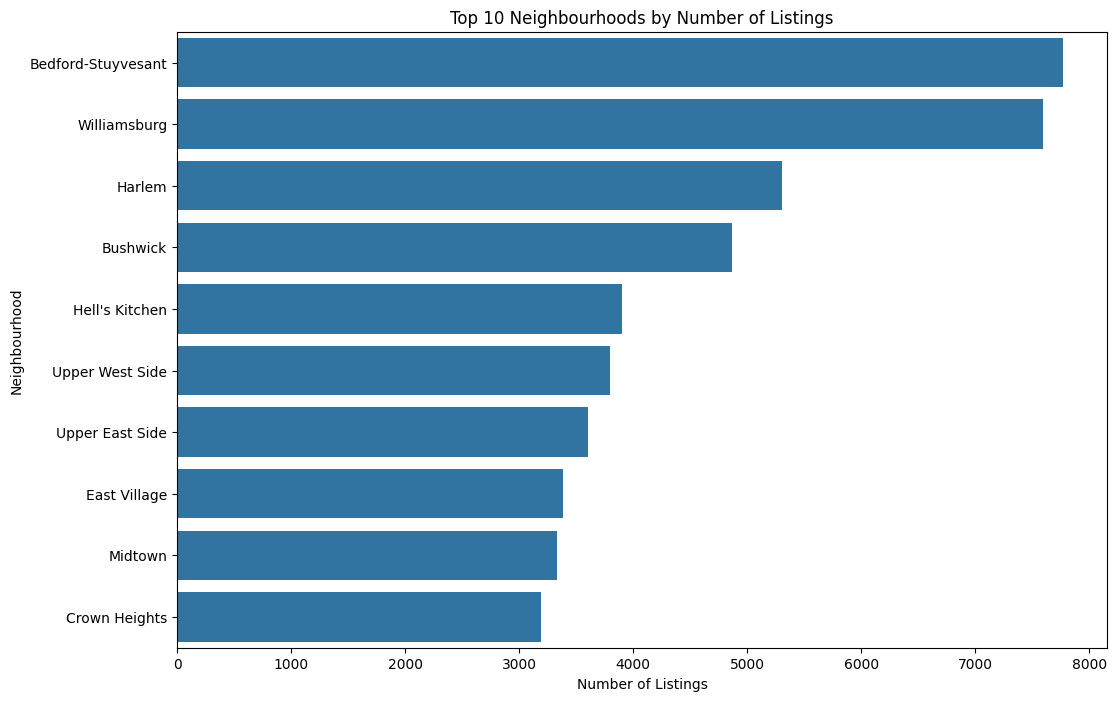

In [18]:
if df is not None:
    print("\n--- 2. Geographic Hotspots Analysis ---")
    top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index)
    plt.title('Top 10 Neighbourhoods by Number of Listings')
    plt.xlabel('Number of Listings')
    plt.ylabel('Neighbourhood')
    plt.show()


--- 3. Room Type Popularity Analysis ---


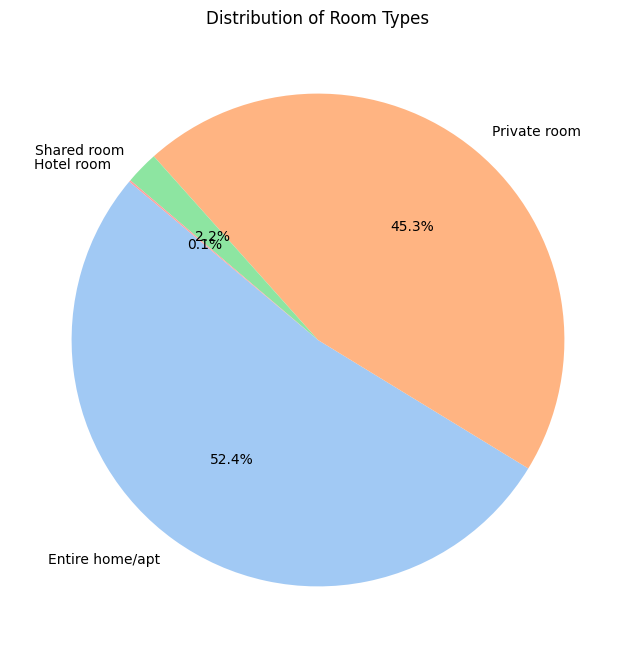

In [19]:
if df is not None:
    print("\n--- 3. Room Type Popularity Analysis ---")
    room_type_counts = df['room type'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Distribution of Room Types')
    plt.show()


--- 4. Host Verification Impact Analysis ---


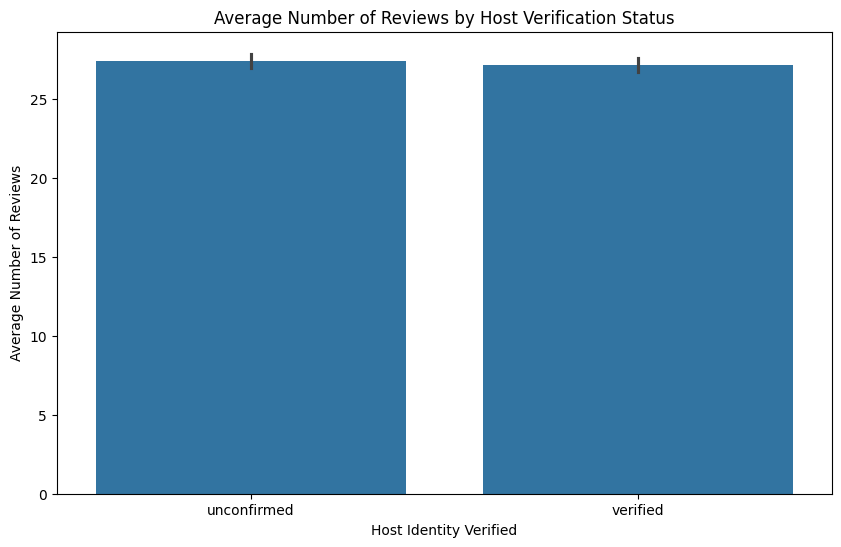

In [20]:
if df is not None:
    print("\n--- 4. Host Verification Impact Analysis ---")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='host_identity_verified', y='number of reviews', data=df)
    plt.title('Average Number of Reviews by Host Verification Status')
    plt.xlabel('Host Identity Verified')
    plt.ylabel('Average Number of Reviews')
    plt.show()


--- 5. Average Price by Room Type and Neighborhood Group Analysis ---


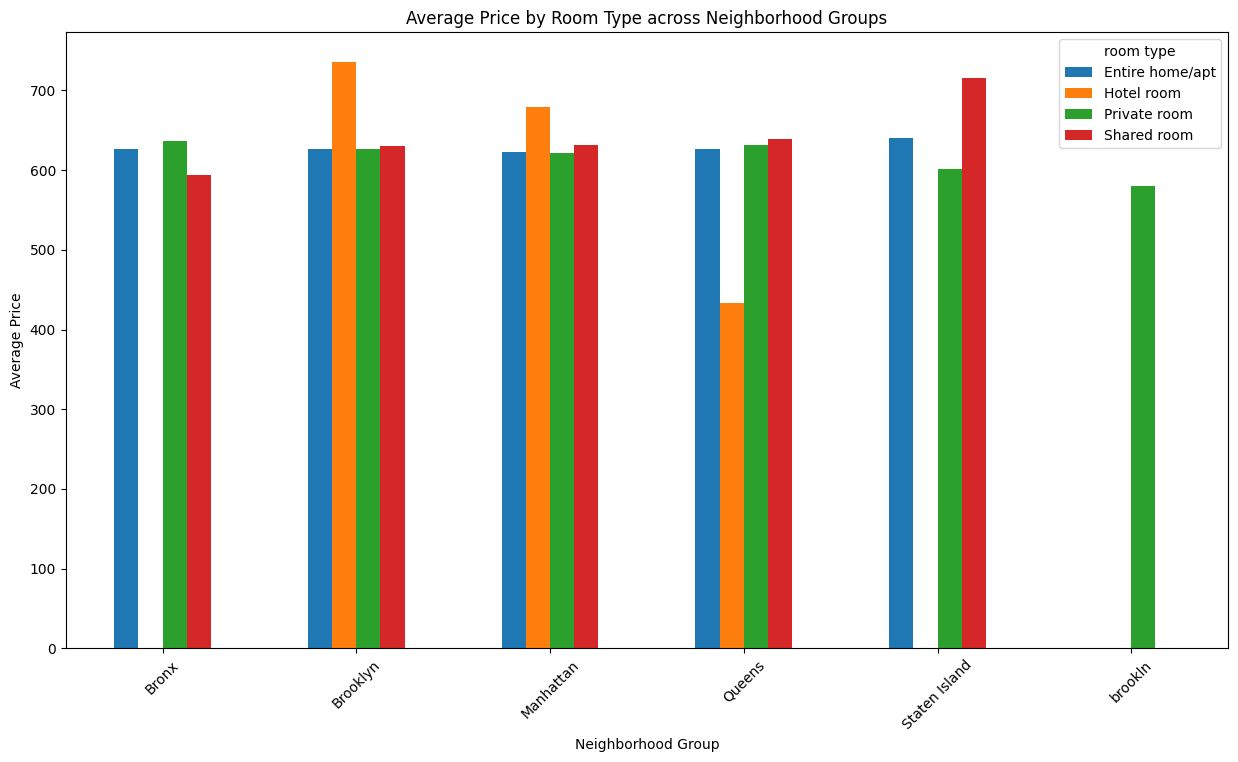

In [21]:
if df is not None:
    print("\n--- 5. Average Price by Room Type and Neighborhood Group Analysis ---")
    avg_price_by_room_neigh = df.groupby(['neighbourhood group', 'room type'])['price'].mean().unstack()
    avg_price_by_room_neigh.plot(kind='bar', figsize=(15, 8))
    plt.title('Average Price by Room Type across Neighborhood Groups')
    plt.xlabel('Neighborhood Group')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()


--- 6. Cancellation Policy vs. Number of Reviews Analysis ---


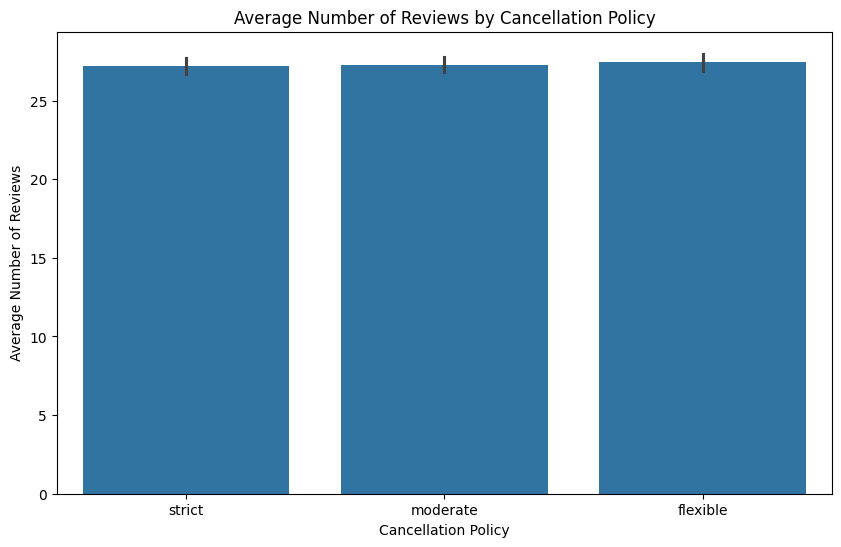

In [22]:
if df is not None:
    print("\n--- 6. Cancellation Policy vs. Number of Reviews Analysis ---")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cancellation_policy', y='number of reviews', data=df)
    plt.title('Average Number of Reviews by Cancellation Policy')
    plt.xlabel('Cancellation Policy')
    plt.ylabel('Average Number of Reviews')
    plt.show()


--- 7. Impact of Construction Year on Price Analysis ---


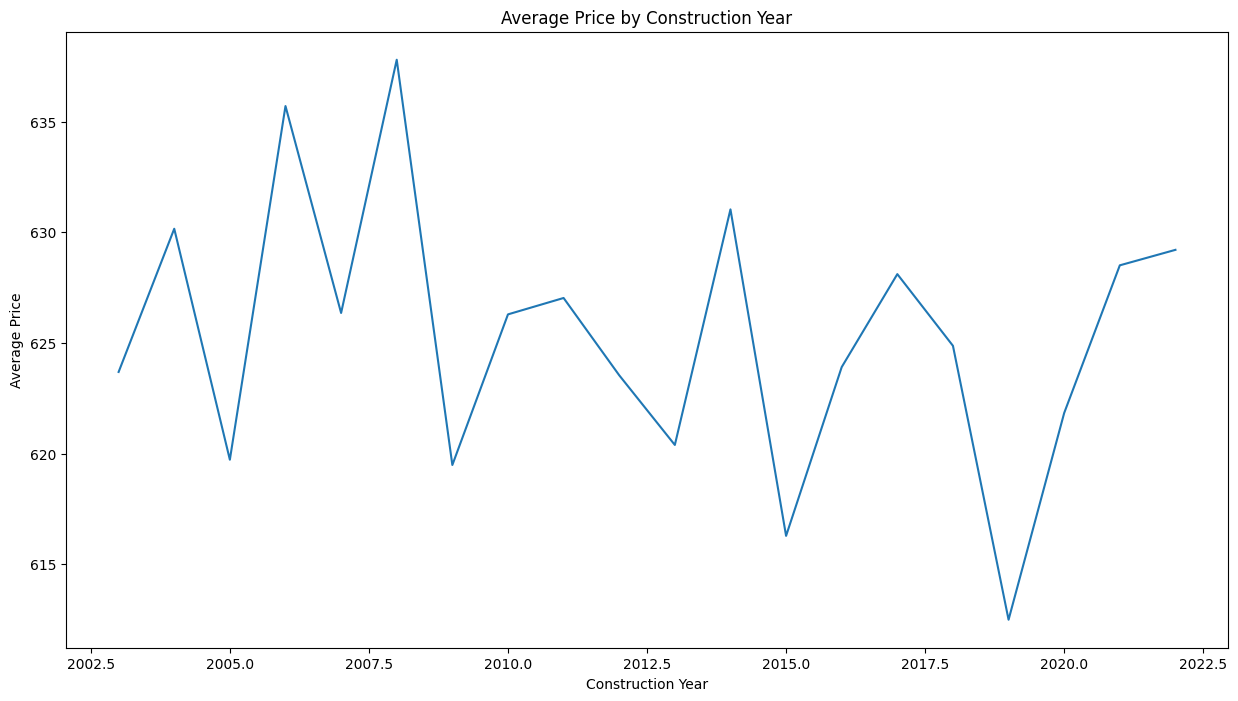

In [23]:
if df is not None:
    print("\n--- 7. Impact of Construction Year on Price Analysis ---")
    avg_price_by_year = df.groupby('Construction year')['price'].mean().sort_index()
    plt.figure(figsize=(15, 8))
    sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)
    plt.title('Average Price by Construction Year')
    plt.xlabel('Construction Year')
    plt.ylabel('Average Price')
    plt.show()


--- 8. Availability vs. Reviews per Month Correlation ---


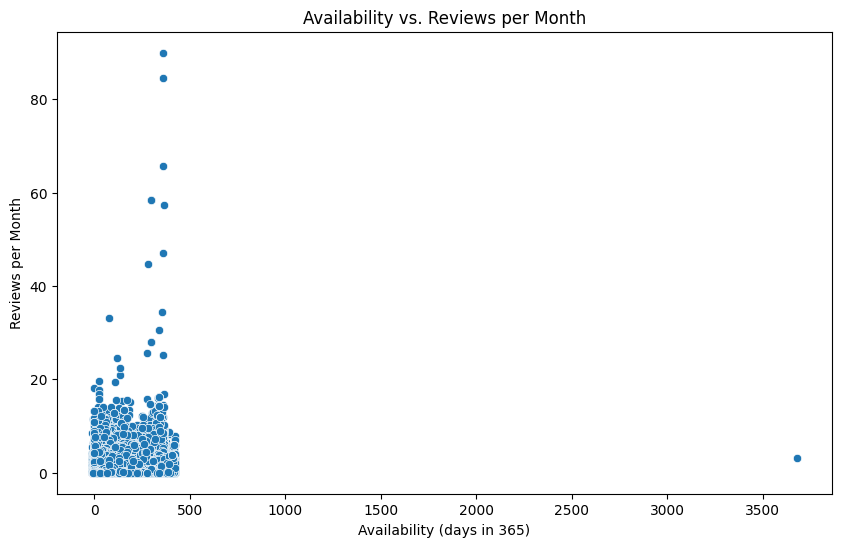

In [24]:
if df is not None:
    print("\n--- 8. Availability vs. Reviews per Month Correlation ---")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='availability 365', y='reviews per month', data=df)
    plt.title('Availability vs. Reviews per Month')
    plt.xlabel('Availability (days in 365)')
    plt.ylabel('Reviews per Month')
    plt.show()